In [24]:
import pandas as pd
import numpy as np
import datetime 
from pandas_datareader import data as pdr

import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import hvplot.pandas
%matplotlib inline
import seaborn as sns
from yahoofinancials import YahooFinancials

In [25]:
#Five year data 
start_sp = datetime.datetime(2014, 10, 1)
end_sp = datetime.datetime(2019, 10, 1)

#create dataframes

#Bitcoin 
VGT_df_five = pdr.get_data_yahoo('VGT', start_sp, end_sp)
VGT_df = pdr.get_data_yahoo('VGT', start_sp, end_sp)
VGT_df['Close'][-1]

213.61000061035156

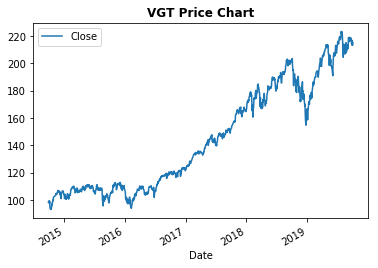

In [26]:
VGT_df_five.plot(y="Close")
plt.title("VGT Price Chart", weight="bold");

In [27]:
#Drop extra columns to be left with closing price 
VGT_df_five.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
VGT_df_five.head()

,Close
Date,
2014-10-01,98.430000
2014-10-02,98.470001
2014-10-03,99.349998
2014-10-06,99.209999
2014-10-07,97.529999


In [28]:
# calculate daily returns of VGT
VGT_df_five_returns = VGT_df_five.pct_change()
VGT_df_five_returns.head()

,Close
Date,
2014-10-01,NaN
2014-10-02,0.000406
2014-10-03,0.008937
2014-10-06,-0.001409
2014-10-07,-0.016934


In [29]:
VGT_df_five_returns = VGT_df_five_returns.rename(columns = {"Close": "VGT Daily Returns"}) 
VGT_df_five_returns = VGT_df_five_returns.fillna(0, inplace=False)
VGT_df_five_returns.head()

,VGT Daily Returns
Date,
2014-10-01,0.000000
2014-10-02,0.000406
2014-10-03,0.008937
2014-10-06,-0.001409
2014-10-07,-0.016934


In [30]:
# calculate the mean of daily returns for VGT
avg_VGT_df_five_returns = VGT_df_five_returns.mean()['VGT Daily Returns']
avg_VGT_df_five_returns

# calculate the standard deviation of daily returns for VGT

std_VGT_df_five_returns = VGT_df_five_returns.std()['VGT Daily Returns']
std_VGT_df_five_returns

0.011261558615535188

In [34]:
# Sets the number of simulations, trading days, and gets the last closing price of VGT from DataFrame
num_simulations = 1000
num_trading_days = 365
VGT_last_price = VGT_df['Close'][-1]
# Initializes an empty DataFrame to hold simulated prices for each simulation
simulated_VGT_price_df = pd.DataFrame()

# Run the simulations of projecting VGT prices for the next trading year, `n` times
for n in range(num_simulations):

    # Initializes the simulated prices list with the last closing price of VGT
    simulated_VGT_prices = [VGT_last_price]
    
    # Simulates the returns for 252 days
    for i in range(num_trading_days):
        # Calculate the simulated price using the last price within the list
        simulated_price = simulated_VGT_prices[-1] * (1 + np.random.normal(avg_VGT_df_five_returns, std_VGT_df_five_returns))
        # Append the simulated price to the list
        simulated_VGT_prices.append(simulated_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_VGT_price_df[f"Simulation {n+1}"] = pd.Series(simulated_VGT_prices)

# Print head of DataFrame
simulated_VGT_price_df.tail()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
361,313.347520,208.872144,202.950496,220.321404,244.536897,365.109040,285.033618,199.569415,283.217143,348.968341,...,298.717349,256.762114,299.733007,374.033935,223.546192,215.556707,241.172770,370.733793,311.836259,215.308337
362,311.311458,205.793929,200.839641,221.742508,246.604367,362.823830,280.403649,200.312134,284.203480,351.678689,...,296.968861,259.966001,301.641125,384.360908,223.952774,215.463017,243.133180,369.259082,311.252722,214.536832
363,313.436918,205.746610,205.996115,219.519030,249.747835,367.871312,281.118390,201.272895,279.210339,349.544548,...,297.169399,264.068881,308.223068,380.280936,222.558843,214.365484,243.271574,370.289997,318.841737,215.499053
364,309.132300,204.266923,202.711126,221.139467,246.909498,366.543644,288.336741,198.146559,281.368330,342.835159,...,299.936799,261.609122,309.605196,382.659995,229.214902,217.000539,246.325461,375.407900,318.662042,215.349655
365,306.686719,201.852578,201.188868,222.171746,249.512069,368.505874,292.406916,202.843946,281.133104,345.296248,...,303.908590,260.729936,308.552020,385.495312,228.446440,215.182954,249.999730,374.872798,315.549674,218.824252


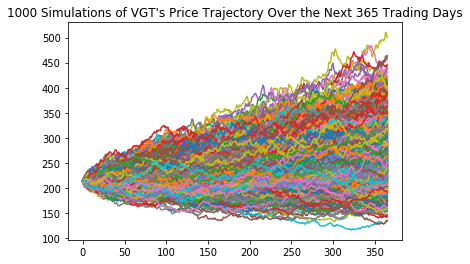

In [35]:
# the trajectory of VGT stock based on a x trading day simulation
plot_title = f"{n+1} Simulations of VGT's Price Trajectory Over the Next 365 Trading Days"
simulated_VGT_price_df.plot(legend=None, title=plot_title)

In [36]:
# a list of the last price for each simulation for VGT
VGT_simulated_ending_prices = simulated_VGT_price_df.iloc[-1, :]
VGT_simulated_ending_prices.head()

Simulation 1    306.686719
Simulation 2    201.852578
Simulation 3    201.188868
Simulation 4    222.171746
Simulation 5    249.512069
Name: 365, dtype: float64

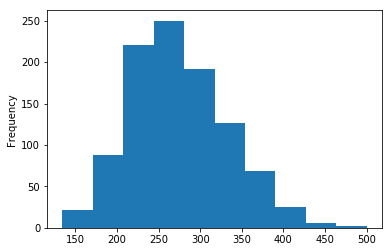

In [37]:
# a frequency distribution of simulated ending prices
VGT_simulated_ending_prices.plot(kind='hist')

In [38]:
#the 95% confidence interval for simulated ending prices
confidence_interval = VGT_simulated_ending_prices.quantile(q=[0.025, 0.975])
confidence_interval

0.025    173.087528
0.975    399.208025
Name: 365, dtype: float64

In [ ]:
# a probability distribution histogram of simulated ending prices with markings for a 95% confidence interval
plt.figure();
B_simulated_ending_prices.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')